1. Đọc file .data từ UCI và lưu .csv

In [136]:
import pandas as pd

column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

df_raw = pd.read_csv("../data/raw.data", 
                     names=column_names,
                     na_values="?")

df_raw.to_csv("../data/raw.csv", index=False)
df_raw.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


2. Làm sạch dữ liệu

In [137]:
# Kiểm tra missing
print(df_raw.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [138]:
# Xử lý missing
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

df_filled = pd.DataFrame(
    imputer.fit_transform(df_raw),
    columns=df_raw.columns
)

df_raw = df_filled

# Kiểm tra missing
print(df_raw.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


3. Xử lý Outliers bằng IQR (Capping)

In [139]:
import numpy as np

numeric_cols = ["age","trestbps","chol","thalach","oldpeak"]
for col in numeric_cols:
    Q1 = df_raw[col].quantile(0.25)
    Q3 = df_raw[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df_raw[col] = df_raw[col].clip(lower, upper)

4. Chuẩn hóa dữ liệu

In [140]:
from sklearn.preprocessing import StandardScaler

num_cols = ["age","trestbps","chol","thalach","oldpeak"]
scaler = StandardScaler()
df_raw[numeric_cols] = scaler.fit_transform(df_raw[numeric_cols])


In [141]:
# Lưu dữ liệu
df_raw.to_csv("../data/cleaned_data.csv", index=False)

5. Trực quan hóa

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA

df = df_raw.copy()

# Tạo thư mục lưu hình
os.makedirs("../data/figures", exist_ok=True)

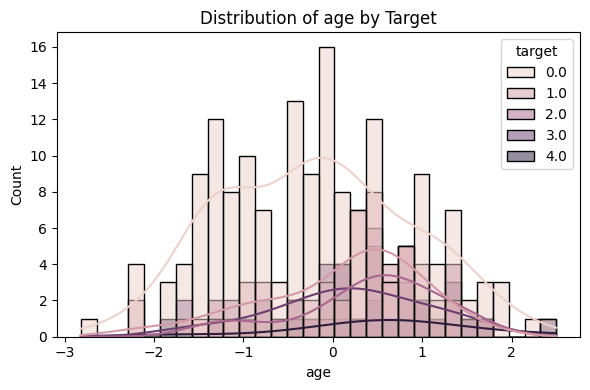

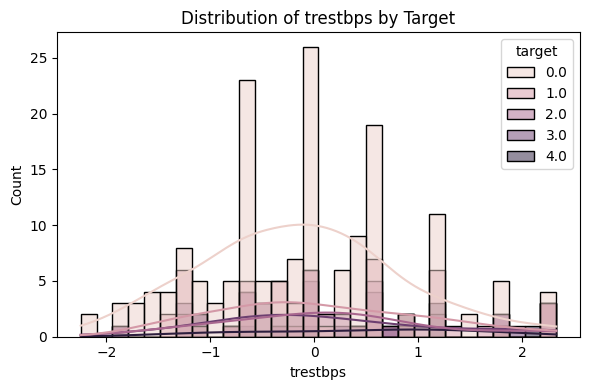

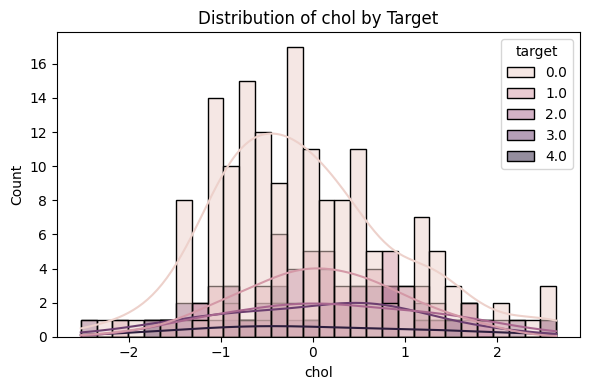

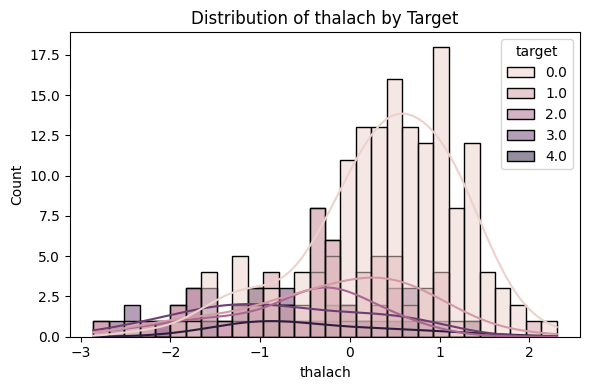

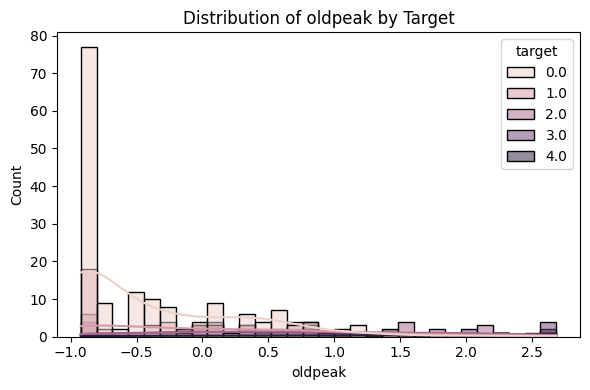

In [143]:
# Histogram theo TARGET
for col in ["age","trestbps","chol","thalach","oldpeak"]:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="target", kde=True, bins=30)
    plt.title(f"Distribution of {col} by Target")
    plt.tight_layout()
    plt.savefig(f"../data/figures/hist_target_{col}.png")
    plt.show()
    plt.close()

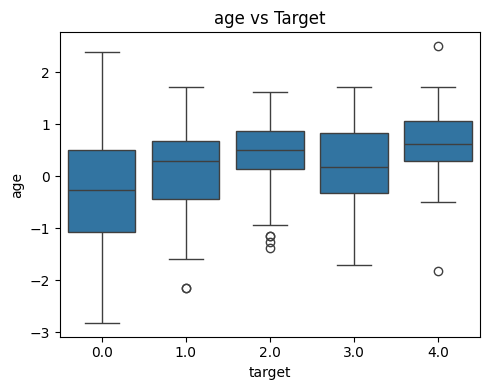

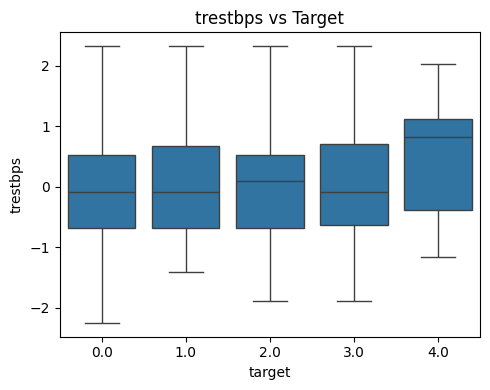

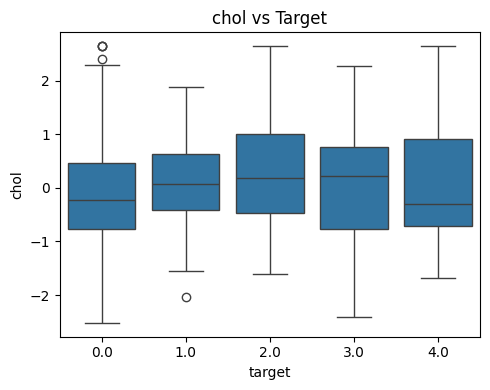

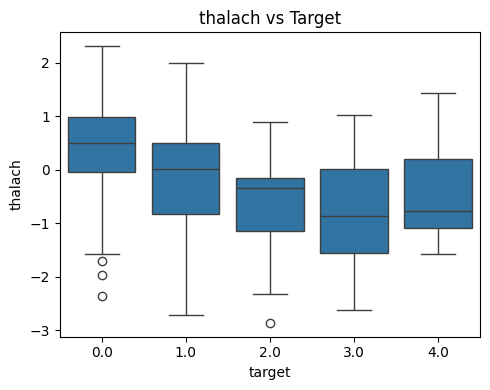

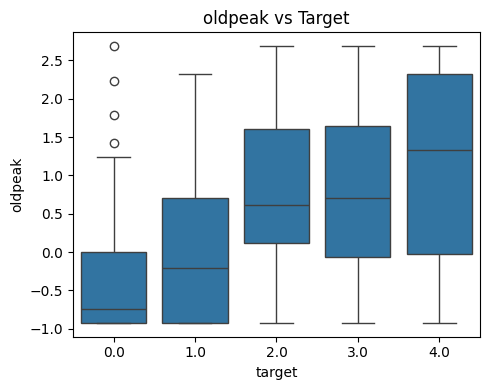

In [144]:
# Boxplot theo TARGET
for col in ["age","trestbps","chol","thalach","oldpeak"]:
    plt.figure(figsize=(5,4))
    sns.boxplot(x="target", y=col, data=df)
    plt.title(f"{col} vs Target")
    plt.tight_layout()
    plt.savefig(f"../data/figures/box_target_{col}.png")
    plt.show()
    plt.close()

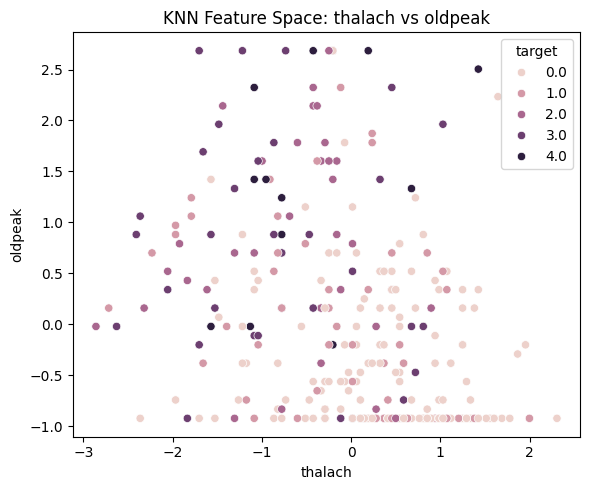

In [145]:
# Scatter 2D
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df,
    x="thalach", y="oldpeak",
    hue="target"
)
plt.title("KNN Feature Space: thalach vs oldpeak")
plt.tight_layout()
plt.savefig("../data/figures/scatter_knn_space.png")
plt.show()
plt.close()

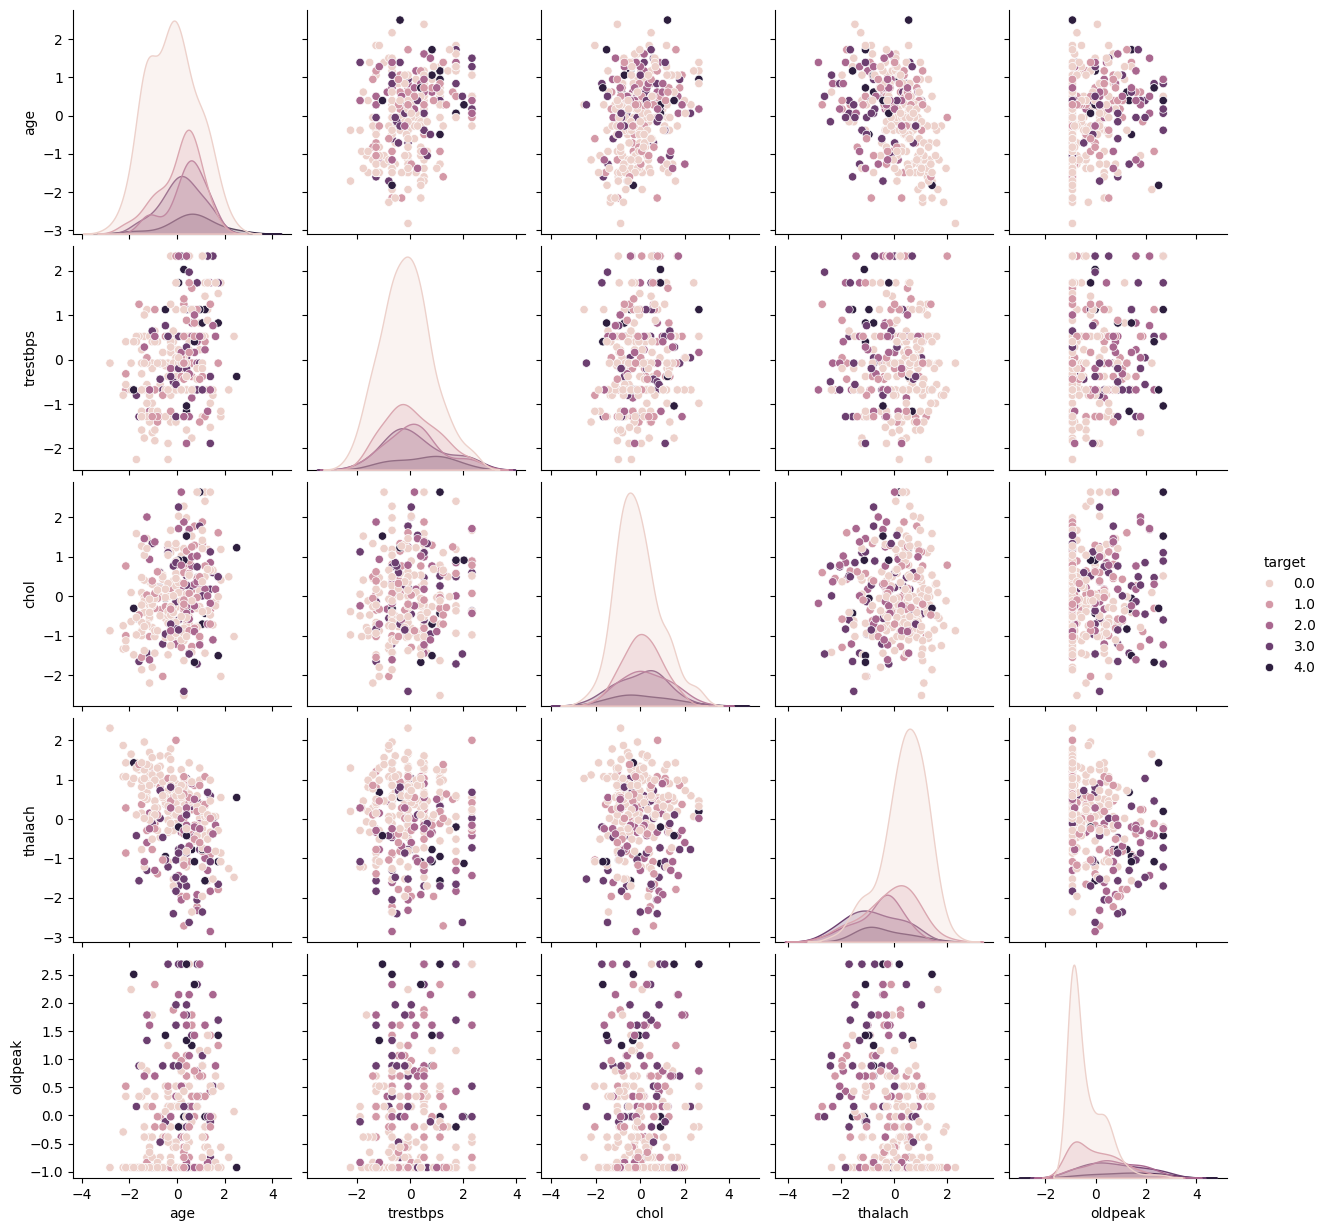

In [146]:
# Pairplot_Tổng quan khả năng tách lớp
pairplot_cols = ["age","trestbps","chol","thalach","oldpeak","target"]

g = sns.pairplot(df[pairplot_cols], hue="target")
g.savefig("../data/figures/pairplot_knn.png")
plt.show()

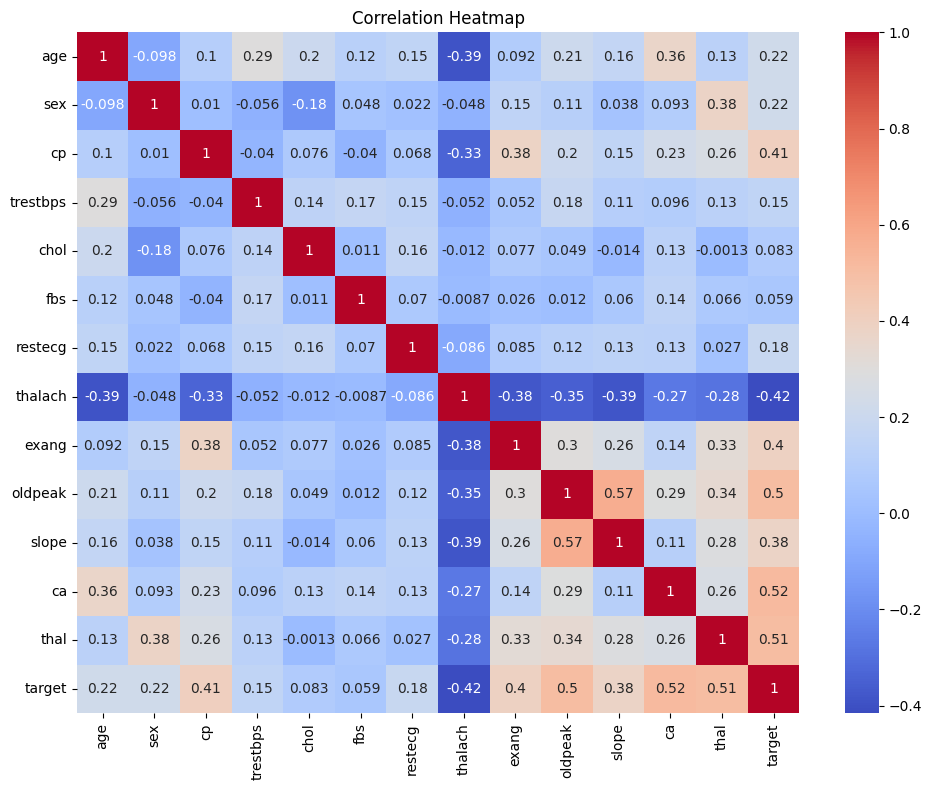

In [147]:
# Heatmap tương quan 
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("../data/figures/corr_heatmap.png")
plt.show()
plt.close()

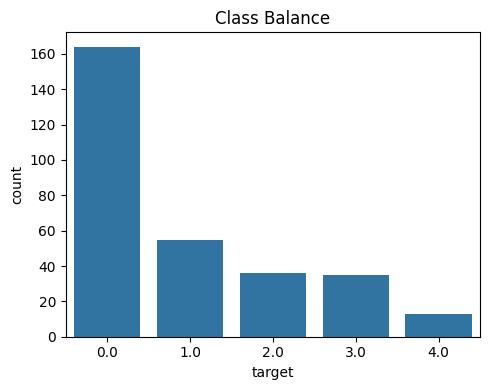

In [148]:
# Kiểm tra cân bằng lớp
plt.figure(figsize=(5,4))
sns.countplot(x=df["target"])
plt.title("Class Balance")
plt.tight_layout()
plt.savefig("../data/figures/class_balance.png")
plt.show()
plt.close()

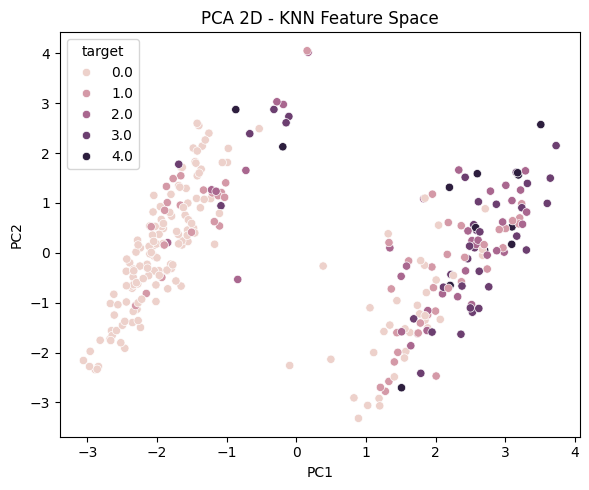

In [149]:
# PCA 2D
X = df.drop("target", axis=1)
y = df["target"]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=["PC1","PC2"])
df_pca["target"] = y.values

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df_pca,
    x="PC1", y="PC2",
    hue="target"
)
plt.title("PCA 2D - KNN Feature Space")
plt.tight_layout()
plt.savefig("../data/figures/pca_knn.png")
plt.show()
plt.close()

Nội dung Data Dictionary

In [150]:
data_dict = """
age: scaled numeric
sex: 0=female, 1=male
cp: chest pain type (0–3)
trestbps: scaled numeric
chol: scaled numeric
fbs: fasting blood sugar > 120 mg/dl
restecg: resting ECG results
thalach: scaled numeric
exang: exercise induced angina
oldpeak: scaled numeric
slope: slope of peak exercise ST segment
ca: number of major vessels
thal: thalassemia (3, 6, 7)
target: 0=healthy, 1=disease
"""

with open("../data/description.md", "w", encoding="utf-8") as f:
    f.write(data_dict)
